## IMDB datset data analysis
This is a simple data analysis project using IMDB dataset from Kaggle

### Import Library and Get data from the included CSV file

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [30]:
imdb_dataset = pd.read_csv("./data/imdb_top_1000.csv")

In [31]:
imdb_dataset.shape

(1000, 16)

In [32]:
imdb_dataset.tail()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
999,https://m.media-amazon.com/images/M/MV5BMTY5OD...,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


In [33]:
imdb_dataset.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


### Checking data for null value and fix them if necessary
Checking the data for null value and either replace them with blank for string data or 0 for numerical data

In [34]:
print(imdb_dataset.isnull().sum())

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [35]:
imdb_dataset["Certificate"] = imdb_dataset["Certificate"].fillna("")

In [36]:
print(imdb_dataset.isnull().sum())

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [37]:
imdb_dataset["Meta_score"] = imdb_dataset["Meta_score"].fillna(imdb_dataset["Meta_score"].median())
imdb_dataset["Gross"].dtypes

dtype('O')

In [38]:
print(imdb_dataset.isnull().sum())

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [39]:
imdb_dataset["Gross"] = imdb_dataset["Gross"].str.replace(",","")
imdb_dataset["Gross"] = imdb_dataset["Gross"].fillna(0)

In [40]:
imdb_dataset.tail()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,0
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,0
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,0
999,https://m.media-amazon.com/images/M/MV5BMTY5OD...,The 39 Steps,1935,,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,0


In [41]:
imdb_dataset["Gross"] = imdb_dataset["Gross"].astype(int)

In [42]:
imdb_dataset["Gross"].dtype

dtype('int64')

In [43]:
corr_imdb_dataset = imdb_dataset.select_dtypes(include=["number"])

## Find data correlation

In [44]:
corr_imdb_dataset.corr()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
IMDB_Rating,1.000000,0.258650,0.494979,0.082381
Meta_score,0.258650,1.000000,-0.026940,-0.059695
No_of_Votes,0.494979,-0.026940,1.000000,0.602128
Gross,0.082381,-0.059695,0.602128,1.000000


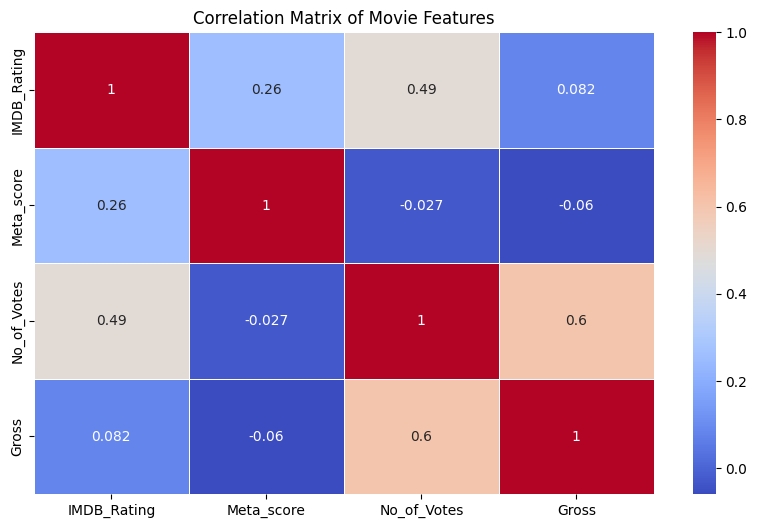

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_imdb_dataset.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Movie Features")
plt.show()

There is some correlation between IMDB ratings and Number of Votes at 0.49 while the other are really low at 0.26 for Meta score and 0.082 for Gross. And none of the other have any form of correlation higher than 0.4.

array([[<Axes: title={'center': 'IMDB_Rating'}>,
        <Axes: title={'center': 'Meta_score'}>],
       [<Axes: title={'center': 'No_of_Votes'}>,
        <Axes: title={'center': 'Gross'}>]], dtype=object)

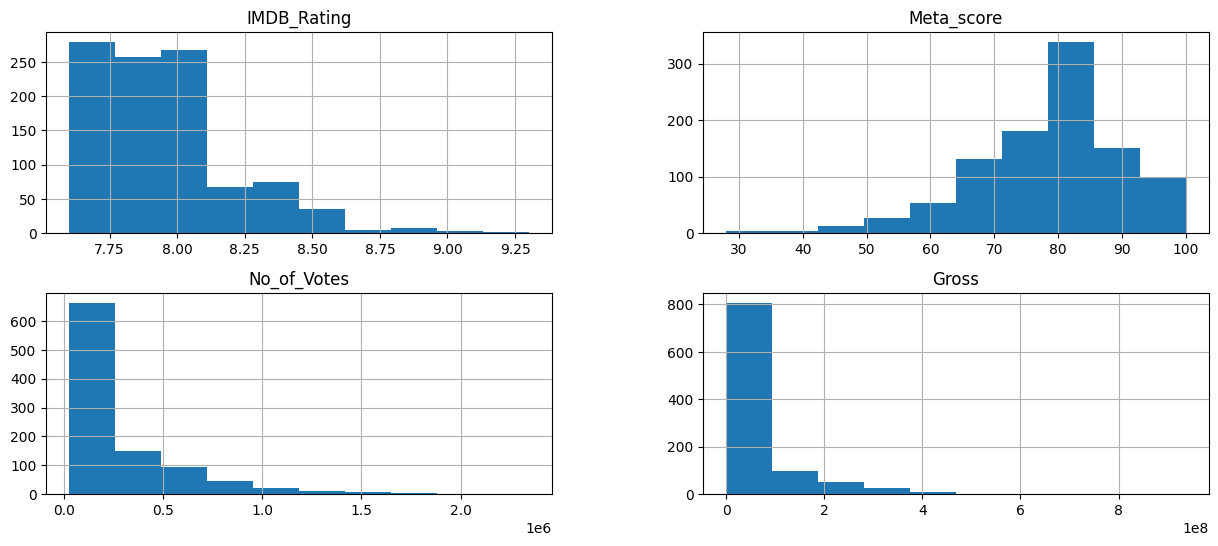

In [ ]:
corr_imdb_dataset.hist(figsize= (15,6))

The distribution is not balanced since this is just an IMDB datset for the top 100 movies. Gross have 0 as the most frequent data because it is filled in for null value in Gross collumn.

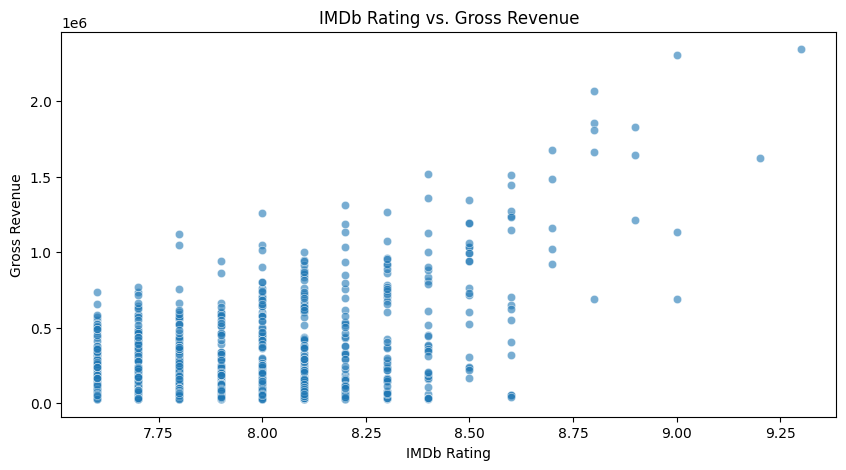

In [49]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=imdb_dataset["IMDB_Rating"], y=imdb_dataset["No_of_Votes"], alpha=0.6)
plt.xlabel("IMDb Rating")
plt.ylabel("Gross Revenue")
plt.title("IMDb Rating vs. Gross Revenue")
plt.show()

<Axes: title={'center': 'Most voted movie'}, xlabel='Series_Title', ylabel='No_of_Votes'>

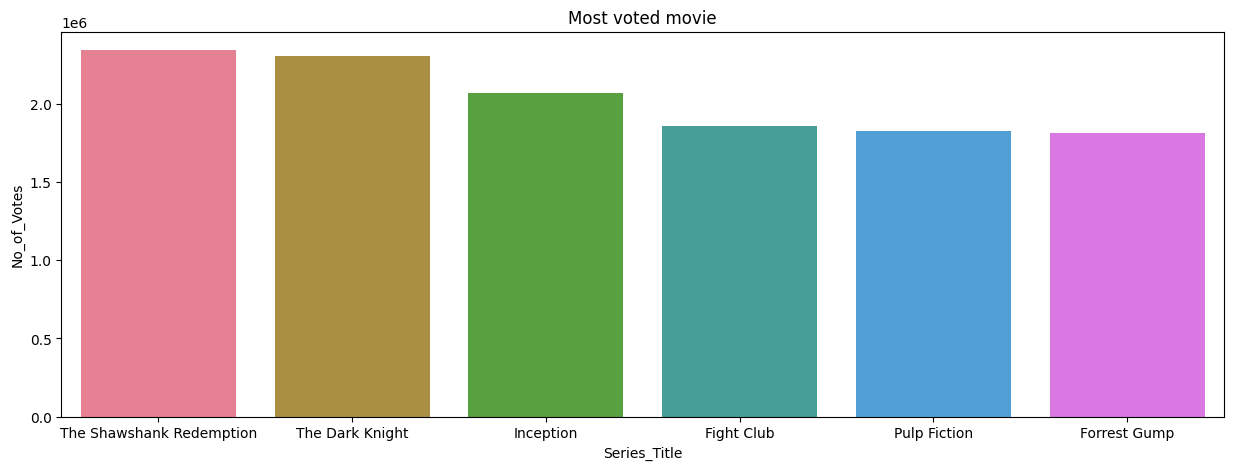

In [ ]:
top_voted = imdb_dataset.sort_values(["No_of_Votes"], ascending = False)

fig,axs=plt.subplots(figsize=(15,5))
plt.title("Most voted movie")
sns.barplot(x=top_voted["Series_Title"][:6], y=top_voted["No_of_Votes"][:6], hue=top_voted["Series_Title"][:6], palette= "husl")

<Axes: title={'center': 'Top voted movie IMDB rating'}, xlabel='Series_Title', ylabel='Gross'>

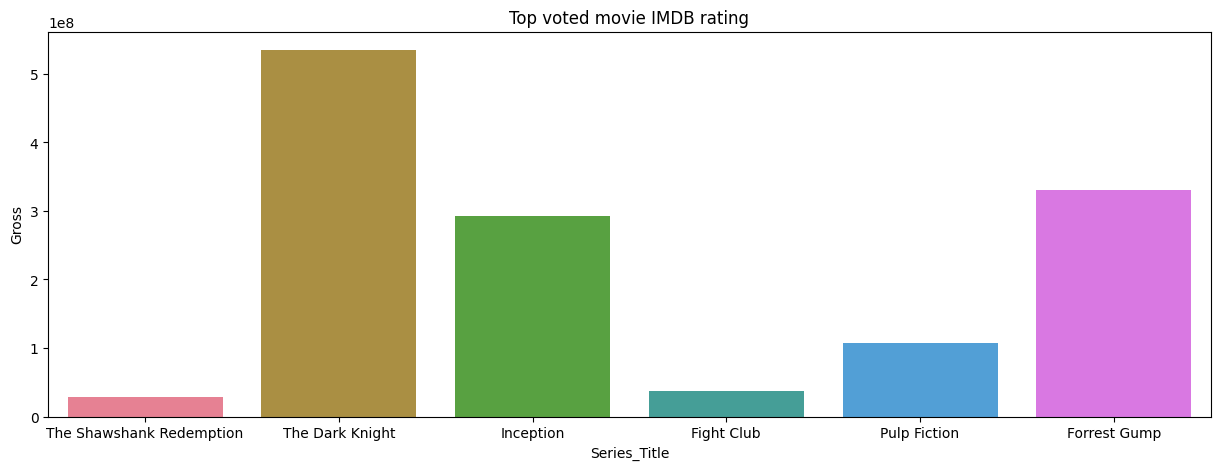

In [ ]:
fig,axs=plt.subplots(figsize=(15,5))
plt.title("Top voted movie IMDB rating")
sns.barplot(x=top_voted["Series_Title"][:6], y=top_voted["Gross"][:6], hue=top_voted["Series_Title"][:6], palette= "husl")

<Axes: title={'center': 'Top voted movie IMDB rating'}, xlabel='Series_Title', ylabel='Meta_score'>

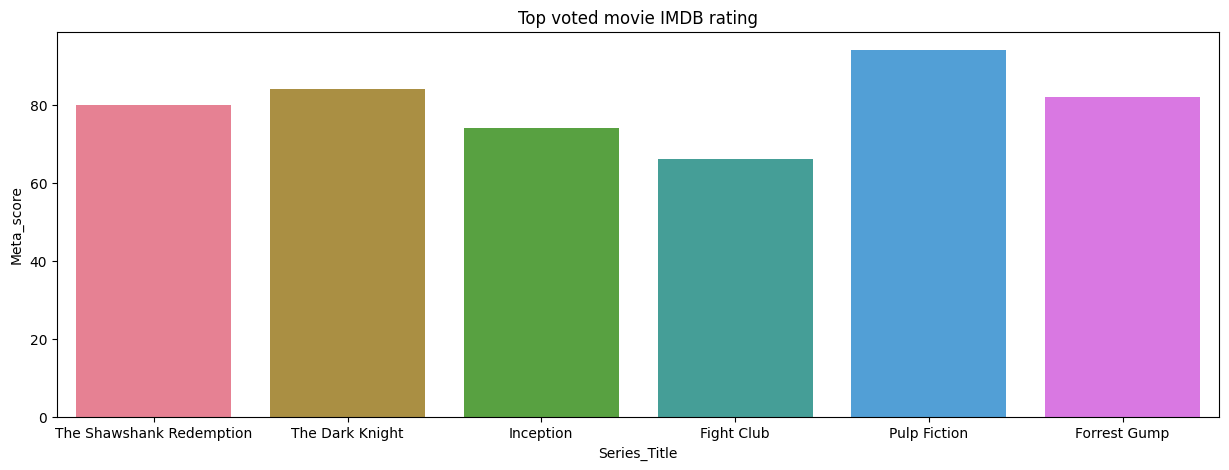

In [53]:
fig,axs=plt.subplots(figsize=(15,5))
plt.title("Top voted movie IMDB rating")
sns.barplot(x=top_voted["Series_Title"][:6], y=top_voted["Meta_score"][:6], hue=top_voted["Series_Title"][:6], palette= "husl")


#### A pie chart to show the distribution of genre within the top 1000 movies
As seen through the chart, the most popular genre was Drama(28.5%) followed by Comedy(9.2%) and Crime(8.2%)

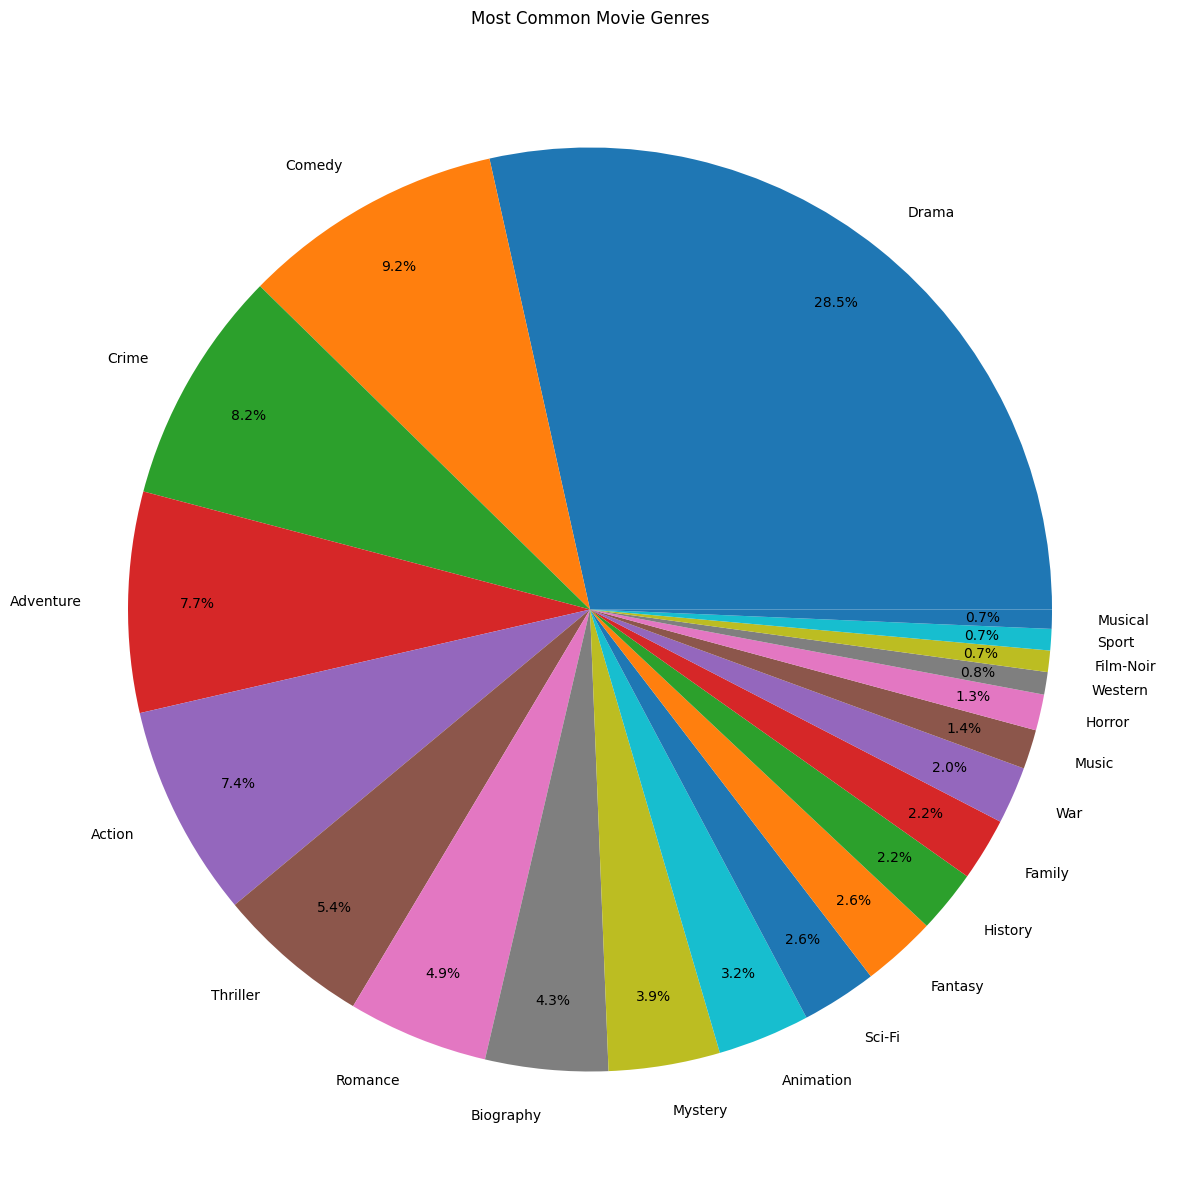

In [ ]:
from collections import Counter
genre_split = imdb_dataset["Genre"].str.split(", ")

all_genre = []

for sub_list in genre_split:
    for genre in sub_list:
        all_genre.append(genre)

genre_counts = Counter(all_genre)

# Convert to DataFrame for visualization
genre_df = pd.DataFrame.from_dict(genre_counts, orient="index", columns=["Count"]).reset_index()
genre_df.rename(columns={"index": "Genre"}, inplace=True)
genre_df = genre_df.sort_values(["Count"], ascending=False)
plt.figure(figsize=(15,15))
plt.pie(x=genre_df["Count"], labels=genre_df["Genre"],autopct="%1.1f%%",pctdistance=0.85)
plt.title("Most Common Movie Genres")
plt.show()

In [ ]:
star_list = list(imdb_dataset["Star1"]) + list(imdb_dataset["Star2"]) + list(imdb_dataset["Star3"])
star_counts = Counter(star_list)

star_df = pd.DataFrame.from_dict(star_counts, orient="index", columns=["Count"]).reset_index()
star_df.rename(columns={"index": "Actor"}, inplace=True)

# Show top 10 most frequently appearing actors
star_df = star_df.sort_values(by="Count", ascending=False)
print(star_df.head(20))

                  Actor  Count
13       Robert De Niro     17
10            Tom Hanks     14
3             Al Pacino     13
11       Clint Eastwood     12
8     Leonardo DiCaprio     11
2        Christian Bale     11
9             Brad Pitt     10
27        James Stewart     10
169          Matt Damon     10
442   Denzel Washington      9
186         Ethan Hawke      9
276         Johnny Depp      9
42      Humphrey Bogart      9
59        Harrison Ford      8
48           Aamir Khan      8
815         Emma Watson      7
282          Tom Cruise      7
93           Cary Grant      7
624  Scarlett Johansson      7
32        Russell Crowe      7


C:\Users\felwi\AppData\Local\Temp\ipykernel_17356\56782523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=star_df["Actor"][:20], y=star_df["Count"][:20], palette="coolwarm")


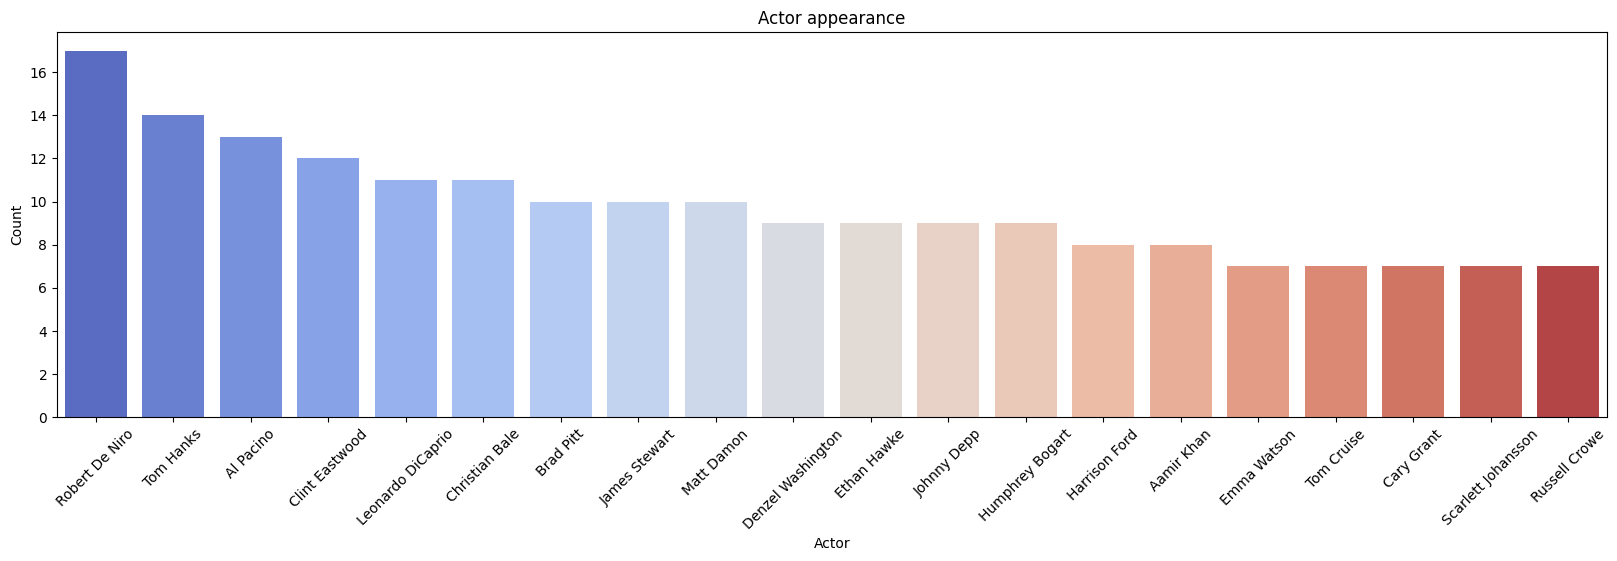

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x=star_df["Actor"][:20], y=star_df["Count"][:20], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Actor appearance")
plt.show()

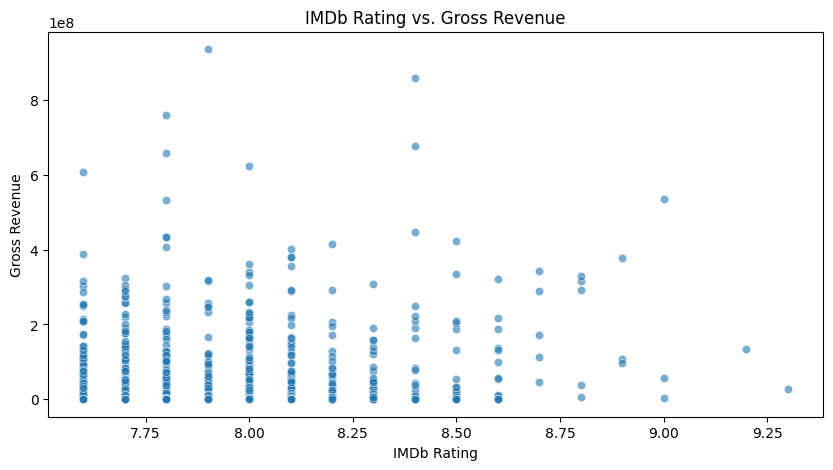